In [ ]:
# lets view kmeans as a latent variable model where z is one-hot descrete latent variable
from torch.distributions.dirichlet import Dirichlet
from torch.nn.functional import one_hot
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class LVKmeans(nn.Module):
    def __init__(self, n_centroids, output_dim, latent_size=400):
        super(LVKmeans, self).__init__()
        self.n_centroids = n_centroids
        self.output_dim = output_dim
        self.latent_size = latent_size
        # decoder is a linear layer
        #output_dim = n_centroids
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, output_dim, bias=False),
        )
        # init z to one-hot descrete latent variable
        self.z = nn.Parameter(
            Dirichlet(torch.ones(n_centroids)).sample((latent_size,)).T
            , requires_grad=True
        )
        self.projector = nn.Sequential(
            nn.Linear(n_centroids, n_centroids *10),
            nn.ReLU(),
            nn.Linear(n_centroids *10, n_centroids *100),
            nn.ReLU(),
            nn.Linear(n_centroids *100, n_centroids *10),
            nn.ReLU(),
            nn.Linear(n_centroids *10, n_centroids),
        )
        self.z_l = None
        self.z_l_fuzzy = None
            
        
    def col_one_hot(self, z):
        # one hot encoding
        #z = torch.argmax(z, dim=0)
        z = torch.argmin(z, dim=0)
        z = one_hot(z, num_classes=self.n_centroids).T
        if self.n_centroids == self.latent_size:
            # make z eye matrix
            z = torch.eye(self.n_centroids)

        return z.float()
    
    def get_z(self):
        return self.z
    
    # sample z from without one-hot encoding
    def sample_z(self, regularize=False):
        if regularize:
            z = self.z
        else:
            z = torch.bernoulli(self.z)
        y = self.decoder(z)
        return y, z

    def forward(self, z):
        z = self.col_one_hot(z)
        # make z dtype float
        y = self.decoder(z)
        self.z_l = y
        # make y fuzzy
        y = y + torch.randn(y.shape)* 1
        self.z_l_fuzzy = y
        y = self.projector(y.T).T
        return y
sq, qp = loadData(100)
sq = torch.from_numpy(sq).float()
sq = squares
# =============================================================================
n_centroids = 4
output_dim = 2
latent_size = 400
model = LVKmeans(n_centroids, output_dim, latent_size=latent_size)
#from ebmUtils import *

# criterion
from src.metrics import Linf_simple
from src.ebmUtils import loss_functional
criterion = Linf_simple
# optimizer
learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
c2 = nn.MSELoss()
# epochs
epochs = 100
times = 1
p_times = epochs / times
# create times * figures
col = 4
row = int(times / col) + 1
#fig, axs = plt.subplots(row, col, figsize=(10, 10))
# y = torch.tensor(spiral_data, dtype=torch.float32)
y = sq
# input =torch.from_numpy(spiral_data).float()
input = sq
costs = []
best_model = None
best_cost = float('inf')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
costs = []
rem = []
reg = []
rem.append(torch.tensor(1))
p_c = []
p_p = []
p_e = []
reg_let_r = []
reg_cost_r = []
models = []
test = False
z_l =[]
z_l_fuzzy = []
c_l = []
c_l_fuzzy = []
std = []
mu =[]
for epoch in range(epochs):

    # forward
    outputs = model(model.z)

    # add random noise
    c_l.append(outputs)
    if epoch %1000 == 0:
        scale = 100
        std_ = rem[-1].item()/scale
        outputs = outputs + torch.randn_like(outputs)*std_
        std.append(std_)
        mu.append(outputs)
    # calculate cost
    c_l_fuzzy.append(outputs)
    # make outputs numpy
    cost = loss_functional(outputs, y, model)
    c1 = cost
    F, z = cost.min(1)
    rem.append(torch.sum(F))
    cost = torch.mean(F) 
    #cost = torch.sum(F) + reg_cost + reg_let
    if test == True and epoch > 100000:
        cost = c2_cost + reg_cost + reg_let + c3_cost
    reg.append(0)
    # append latents
    z_l.append(model.z_l)
    z_l_fuzzy.append(model.z_l_fuzzy)
    # backward
    optimizer.zero_grad()
    # make sure cost is torch tensor
    costs.append(cost.item())
    #rem.append(cost)
    cost.backward()
    optimizer.step()
    if cost < best_cost:
        best_cost = cost
        best_model = model
        best_outputs = outputs
        best_z = z
        best_lat = model.z_l
        best_epoch = epoch
    if cost < 6000:
        p_p.append(outputs)
        p_c.append(cost)
        p_e.append(epoch)
    # print
    if (epoch + 1) % p_times == 0:
        # print
        print('Epoch [{}/{}], Cost: {:.4f}'.format(epoch + 1, epochs, cost.item()))
        print('Outputs: ', outputs)
# plot outputs
outputs = best_outputs.detach().numpy()
# plot
fig, ax = plt.subplots()
ax.scatter(outputs[:, 0], outputs[:, 1], s=1, c='b')
# plot outputs
ax.scatter(y[:, 0], y[:, 1], s=1, c='r')
# add a plot for costs
fig, ax = plt.subplots()
ax.plot(costs)
plt.show()


print('Best epoch: ', best_epoch)
print('Best cost: ', best_cost)

(786, 4)


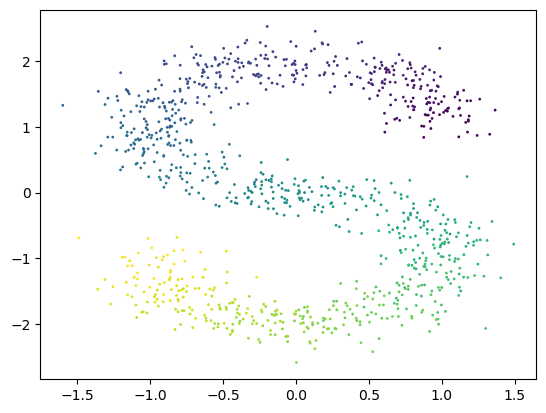

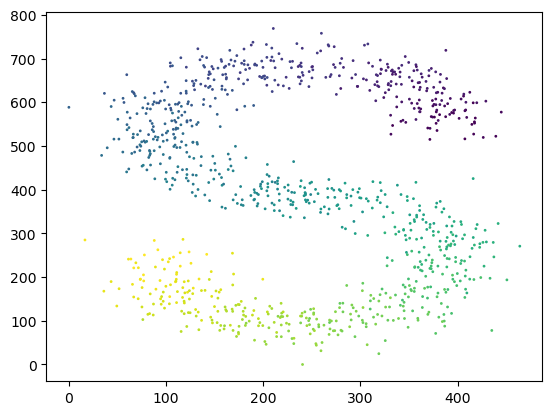

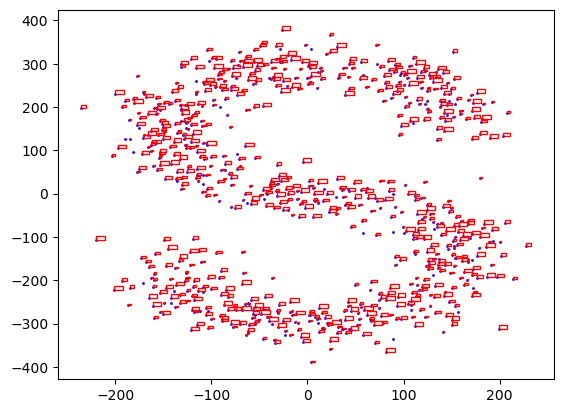

In [1]:
from sklearn.datasets import make_blobs, make_moons, make_circles, make_s_curve, make_swiss_roll
from src.utils.data import createSquares
import matplotlib.pyplot as plt
import numpy as np
#X, y= make_circles(n_samples=1000, noise=0.05, factor=0.5)
X, y = make_s_curve(n_samples=1000, noise=0.2)
# plot 2d
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 2], s=1, c=y)
# take points to 0,300
x_min = X[:, 0].min()
y_min = X[:, 2].min()
X[:, 0] -= x_min
X[:, 2] -= y_min
X = X[:, [0, 2]]
X *= 300 * 0.5
X = np.array(X)
# plot X
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], s=1, c=y)
args = {
    'X': X,
    'y': y,
    'w_lim': [1,10],
    'theta_lim': [1, 3],
    'numberOfData': 1000
}
data = createSquares(**args)
# plot
fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1], s=1, c='b')
print(data.shape)
# plot rectangles
import matplotlib.patches as patches
for i in range(data.shape[0]):
    x = data[i, 0]
    y = data[i, 1]
    w = data[i, 2]
    theta = data[i, 3]
    rect = patches.Rectangle((x, y), w, w, angle=theta, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.show()


In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=3)
# plot
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], s=1, c='b')
plt.show()

In [ ]:
from sklearn.datasets import make_swiss_roll, make_checkerboard
X, y = make_swiss_roll(n_samples=1000, noise=0)
# plot in 2d
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 2], s=1, c=y)

In [ ]:
    
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
def create2moons4squares(**kwargs):
    x_lim = kwargs["x_lim"] # [0, 300]
    y_lim = kwargs["y_lim"] # [0, 300]
    w_lim = kwargs["w_lim"] # [1,4]
    theta_lim = kwargs["theta_lim"] # [0, 2pi]
    plot = kwargs["plot"]
    noise = kwargs["noise"]
    numberOfData = kwargs["numberOfData"]
    normalize = kwargs["normalize"]
    scale = kwargs["scale"]
    scale_factor = kwargs["scale_factor"]
    numberOfMoons = kwargs["numberOfMoons"]
    which_moon = kwargs["which_moon"]
    X, y = make_moons(n_samples=numberOfData, noise=noise)
    if numberOfMoons == 1:
        if which_moon == 'upper':
            X = X[y == 1]
        else:
            X = X[y == 0]
        numberOfData = X.shape[0]
    if normalize:
        x_min = X[:, 0].min()
        y_min = X[:, 1].min()
        X[:, 0] -= x_min
        X[:, 1] -= y_min
        if scale:
            X *= x_lim[1]  * scale_factor
    if plot:
        if numberOfMoons == 1:
            plt.scatter(X[:, 0], X[:, 1])
            plt.show()
        else:
            plt.scatter(X[:, 0], X[:, 1], c=y)
            plt.show()
    squares = []
    
    def check_for_intersection(square, squares):
        for i in range(squares.__len__()):
            if square[0] < squares[i][0] + squares[i][2] and square[0] + square[2] > squares[i][0] and square[1] < squares[i][1] + squares[i][2] and square[1] + square[2] > squares[i][1]:
                return True
        return False
    
    for i in range(numberOfData-1):
        x = int(X[i, 0])
        y = int(X[i, 1])
        w = np.random.randint(w_lim[0], w_lim[1])
        theta = np.random.randint(theta_lim[0], theta_lim[1])
        square = np.array([x, y, w, theta])
        if not check_for_intersection(square, squares):
            squares.append(square)
    squares = np.array(squares)
    if normalize:
        x_mean = squares[:, 0].mean().astype(int)
        y_mean = squares[:, 1].mean().astype(int)
        squares[:, 0] -= x_mean
        squares[:, 1] -= y_mean

    if plot:
        x_lim = [squares[:, 0].min(), squares[:, 0].max()]
        y_lim = [squares[:, 1].min(), squares[:, 1].max()]
        fig, ax = plt.subplots()
        for square in squares:
            ax.add_patch(plt.Rectangle((square[0], square[1]), square[2], square[2], angle=square[3], color='r', fill=False))
        
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        plt.show()
    # make degrees to radians
    squares[:, 3] = np.deg2rad(squares[:, 3])
    return squares
        
        

In [ ]:
from src.utils.data import create2moons4squares 
args = {
    'x_lim' : [0, 300],
    'y_lim' : [0, 300],
    'w_lim' : [1, 4],
    'theta_lim' : [1, 2],
    'plot' : True,
    'noise' : 0.1,
    'numberOfData': 200,
    'normalize' : True,
    'scale' : True,
    'scale_factor' : 0.1,
    'numberOfMoons' : 2,
    'which_moon' : 'upper',
}
data = create2moons4squares(**args)

In [ ]:
from sickit

In [ ]:
path = './models/squares/100/class_teacher_training_results.npy'
res = np.load(path, allow_pickle=True).item()
res

In [3]:
import torch
from src.k_tree import Ktree
from src.utils.data import loadData

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"
#data, _ = loadData(100)
#data = squares


#data = rects
learning_rate = 5e-3 # 1e-2, 5e-3
k = 6
teacher_args = {
    "optimizer_lr": learning_rate,
    "epochs": 200, # 300
    "times": 10,
    "alpha": 0.1, #  projection loss
    "beta": 0.1, # latent loss
    "gamma": 0.02, # repulsive loss
    "delta": 0.01, # fuzzy scale
    "f_clk": 20,
    "scale": 1, # fuzzy scale 
    "number_of_centroids": k,
    "latent_size": 400,
    "encoder_activation": False,
    "encoder_depth": 3,
    "predictor_width": k*100,
    "predictor_depth": 3,
}
n = 20
un_args = {
    "N": n,
    "M": n**2-1, # 10000 - 1
    "epsilon": 0.14 # here a layer value should be somehow included. As layers get denser  epilson should be smaller
}
student_args = {
    "optimizer_lr": 5e-3,
    "epochs": 1000, # 30000, 2000
    "width": 200,
    "depth": 5,
}

stop_criterion = 0.1*k*len(data) if len(data) > 500 else 100
#thresshold = 90
thresshold = stop_criterion
thresshold = 700
ktree = Ktree(thresshold, data, teacher_args, un_args, student_args)
ktree.create_tree(save_path_prefix="models/squares/100/class", plot=True)
#path ='./models/squares/100/class0_student_config.pt'
#ktree.root.create_student_from_config(path)


Creating student for node 0 that has 786 data, which is more than the threshold 700.
Bounding box for node 0: [[-254, 245], [-408, 396]]
Creating teacher for node 0 with 6 centroids.
Training Teacher Model
Epoch: 20/200.. 
 Training loss: 108.03435.. 
 torch.mean(F): 107.17306.. 
 Reg Proj: 0.00000.. 
 Reg Latent: 0.13484.. 
 Repulsive: 0.72645.. 
 Memory: 1.07173.. 
 Output: 
 [[  -1.3862529   -3.704949 ]
 [  12.286766    69.00534  ]
 [  35.177803   186.93225  ]
 [ -38.133705  -206.37912  ]
 [ -12.477303   -67.53561  ]
 [   4.653158    26.543676 ]]
Epoch: 40/200.. 
 Training loss: 122.66279.. 
 torch.mean(F): 121.90632.. 
 Reg Proj: 0.00000.. 
 Reg Latent: 0.15198.. 
 Repulsive: 0.60449.. 
 Memory: -959.40273.. 
 Output: 
 [[  -6.0354486   -1.9018569]
 [  46.5366     147.18607  ]
 [  13.889351    47.985138 ]
 [ -17.282673   -54.703823 ]
 [ -44.193863  -140.47934  ]
 [   3.3777754   10.041064 ]]
Epoch: 60/200.. 
 Training loss: 79.67741.. 
 torch.mean(F): 78.93104.. 
 Reg Proj: 0.0000

In [ ]:
# show limits
lim_X = [data[:, 0].min(), data[:, 0].max()]
lim_Y = [data[:, 1].min(), data[:, 1].max()]
print(lim_X,lim_Y)
# get area
s = (lim_X[1] - lim_X[0]) *(lim_Y[1] - lim_Y[0]) 
# show area
print(s)
ball = 380 *np.sqrt(10)
ball *= 100
print(4*ball**2/s)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
acc = 0
mean_acc = 0
times=0
print_flag = False
random = False
out_of_dist =  False
out_of_manifold = True
#ball =  80
x_lim = min(data[:,0]), max(data[:,0])
y_lim = min(data[:,1]), max(data[:,1])
best_acc = 0
worst_acc = 100
while times < 1:
    # now lets create randomly N points in the space 0-300, 0-300
    # [[-6, 257], [-6, 179]]
    n = 10**2
   
    if random:
        random_p = torch.zeros(n, 2)
        for i in range(n):
            random_p[i] = torch.Tensor([np.random.randint(x_lim[0],x_lim[1]), np.random.randint(y_lim[0],y_lim[1])])
        infer_points = random_p.to(device)
    else:
        nop =  n
        random_p = torch.zeros(nop, 2)
        #x_lim = [0,300]
        #y_lim = [0,300]
        num = int(np.sqrt(nop))
        for i, x in enumerate(np.linspace(x_lim[0],x_lim[1], num)):
            for j, y in enumerate(np.linspace(y_lim[0],y_lim[1], num)):
                random_p[i*num+j] = torch.Tensor([x, y])

        infer_points = random_p.to(device)
        print(infer_points.shape)
        plt.scatter(infer_points[:,0], infer_points[:,1])

    if out_of_dist and out_of_manifold:
        # plot points outside 0,300
        x_lim = [x_lim[0]-ball, x_lim[1]+ball]
        y_lim = [y_lim[0]-ball, y_lim[1]+ball]
        num = int(np.sqrt(nop))
        for i, x in enumerate(np.linspace(x_lim[0],x_lim[1], num)):
            for j, y in enumerate(np.linspace(y_lim[0],y_lim[1], num)):
                random_p[i*num+j] = torch.Tensor([x, y])
        infer_points = random_p.to(device)
        print(infer_points.shape)
        plt.scatter(infer_points[:,0], infer_points[:,1])
    num_of_correct_predictions = 0
    qp = infer_points
    z_wrong = np.zeros(len(qp))
    z_label_wrong = np.zeros(len(qp))
    for i in range(len(qp)):
        query_point = qp[i]
        query_point = torch.Tensor(query_point)
        pred = ktree.query(query_point)
        brute_force = ktree.root.query(query_point)
        # print(pred)
        # print(brute_force)
        if(np.array_equal(pred, brute_force)):
            num_of_correct_predictions += 1
        else:
            z_wrong[i] = max(abs(pred[:2]-brute_force[:2]))
            if z_wrong[i] > 0.1:
                z_label_wrong[i] = 1

            if print_flag:
                print("="*20)
                print(f"Wrong prediction for {query_point}")
                print(f"Predicted {pred}")
                print(f"Brute force {brute_force}")
                # reshape z_wong to be a 2d array
    axis = int(np.sqrt(len(qp)))
    # make contour of the z_wrong
    x = np.linspace(x_lim[0],x_lim[1], axis)                                        
    y = np.linspace(y_lim[0],y_lim[1], axis)
    X, Y = np.meshgrid(x, y)
    Z = z_wrong.reshape(X.shape)
    if out_of_dist and out_of_manifold:
        # make 0 in Z all values between 0,300, 0,300
        # first find index in X 
        #x_index = np.where((X>=x_lim[0]+ball) & (X<= x_lim[1]-ball))
        x_index = np.where((X>=x_lim[0]+ball) & (X<= x_lim[1]-ball))
        # now make Z 0 in these indexes
        Z[x_index] = 0
        
    # make 3d plot
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.contourf(X, Y, Z, 200, cmap='viridis')
    # rotate
    ax.view_init(45, 30)
    acc = num_of_correct_predictions / len(infer_points) * 100
    if acc > best_acc:
        best_acc = acc
    if acc < worst_acc:
        worst_acc = acc

    mean_acc += acc
    times += 1

    print(f"The percentage of correct predictions is {acc:.2f}%")

print(f"The best percentage of correct predictions is {best_acc:.2f}%")
print(f"The mean percentage of correct predictions is {mean_acc/times:.2f}%")
print(f"The worst percentage of correct predictions is {worst_acc:.2f}%")

In [ ]:
# flags
wanna_plot_square = True
# do a 2d contour
fig, ax = plt.subplots()
axis = int(np.sqrt(len(qp)))

for i, x in enumerate(np.linspace(x_lim[0],x_lim[1], axis)):
    for j, y in enumerate(np.linspace(y_lim[0],y_lim[1], axis)):
        random_p[i*axis+j] = torch.Tensor([x, y])
infer_points = random_p.to(device)
y = np.linspace(y_lim[0],y_lim[1], axis)
x = np.linspace(x_lim[0],x_lim[1], axis)
X = np.meshgrid(x, y)[0]
Y = np.meshgrid(x, y)[1]
label = ktree.root.student(qp).max(1)[-1].detach().cpu().numpy()
Z_ = label.reshape(X.shape)
#plt.contourf(X, Y, Z_, 100, cmap='viridis')
ax.contourf(X, Y, Z_, 100, cmap='viridis')
# make color bar of Z_
# plot a scatter of wrong predictions
# make new label
ax.scatter(qp[:,0], qp[:,1], c=z_label_wrong, cmap='bwr')
#plt.colorbar()
# do a plot of the area [0,300]
# plot a square centered at 0,0 with length 300
if wanna_plot_square:
    domain_limits = min(data[:,0]), max(data[:,0]), min(data[:,1]), max(data[:,1])
    plt.plot([domain_limits[0], domain_limits[1]], [domain_limits[2], domain_limits[2]], c='r')
    plt.plot([domain_limits[0], domain_limits[1]], [domain_limits[3], domain_limits[3]], c='r')
    plt.plot([domain_limits[0], domain_limits[0]], [domain_limits[2], domain_limits[3]], c='r')
    plt.plot([domain_limits[1], domain_limits[1]], [domain_limits[2], domain_limits[3]], c='r')

#for square in squares:
#    ax.add_patch(Rectangle((square[0], square[1]), square[2], square[2], angle=np.deg2rad(square[3]), fill=False))
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()


#plt.show()

In [ ]:
num_of_correct_predictions = 0
qp = infer_points
z =  np.zeros(len(qp))
for i in range(len(qp)):
    query_point = qp[i]
    pred = ktree.query(query_point)
    brute_force = ktree.root.query(query_point)
    # print(pred)
    # print(brute_force)
    if(np.array_equal(pred, brute_force)):
        num_of_correct_predictions += 1
    else:
        # do l-inf norm
        z[i] = max(abs(pred[:2]-brute_force[:2]))
print(z)
 
print(f"The percentage of correct predictions is {(num_of_correct_predictions / len(infer_points)) * 100:.2f}%")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

nop =  2000
random_p = torch.zeros(nop, 2)
x_lim = [0,300]
y_lim = [0,300]
# add e
e = 0
x_lim = [x_lim[0]-e, x_lim[1]+e]
y_lim = [y_lim[0]-e, y_lim[1]+e]
num = int(np.sqrt(nop))
random_p = torch.zeros(num*num, 2)
for i, x in enumerate(np.linspace(x_lim[0],x_lim[1], num)):
    for j, y in enumerate(np.linspace(y_lim[0],y_lim[1], num)):
        random_p[i*num+j] = torch.Tensor([x, y])
 
infer_points = random_p.to(device)
plt.scatter(infer_points[:,0], infer_points[:,1])
print(infer_points.shape)

In [ ]:
def R(z, node, infer_points):
    for i in range(len(node.children)):
        if not node.children[i].isLeaf():
            index = z == node.children[i].student(infer_points).max(1)[1]
            qp = infer_points[index]
            z_new = node.children[i].student(qp).max(1)[1]
            max_z = z.max()
            z[index] = max_z + 1 + z_new
            for j in range(len(node.children[i].children)):
                R(z, node.children[i].children[j], qp)
        else:
            if node.parent is not None:
                R(z, node.parent, infer_points)

# Initial prediction
z = ktree.root.student(infer_points).max(1)[1]

# Update z recursively
R(z, ktree.root, infer_points)

# Plot infer_points with colors based on z
plt.scatter(infer_points[:,0], infer_points[:,1], c=z)
plt.show()

In [ ]:
infer_points
z = ktree.root.student(infer_points).max(1)[1]
def R(z, node, infer_points):
    for i in range(len(node.children)):
        if not node.children[i].isLeaf():
            if z in node.children[i].student(infer_points).max(1)[1]:
                index = z == node.children[i].student(infer_points).max(1)[1]
                qp = infer_points[index]
                z_new = node.children[i].student(qp).max(1)[1]
                max_z = z.max()
                z[index] = max_z+ 1 + z_new
                length = len(node.children[i].children)
                for j in range(length):
                    R(z, node.children[i].children[j], infer_points)
        else:
            node = node.parent
            R(z, node, infer_points)
                
R(z, ktree.root, infer_points)
# plot infer points, color coded by the prediction
print(z.max())
plt.scatter(infer_points[:,0], infer_points[:,1], c=z)

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def traverse_and_update(node, infer_points, z, k=3):
    if node.isLeaf():
        return z

    for i in range(k):
        node_flag = node.children[i].isLeaf()
        qp = infer_points[z==i]
        if not node_flag:
            pred = node.children[i].student(qp)
            _, z_ = torch.max(pred, 1)
            max_z = torch.max(z)
            index = z==i
            z[index] = (i+1)*max_z + z_ + 1
            for j in range(k):
                node_flag = node.children[i].children[j].isLeaf()
                qp = infer_points
                if not node_flag:
                    qp = infer_points[index]
                    pred = node.children[i].children[j].student(qp)
                    _, z__ = torch.max(pred, 1)
                    z[index] = (j+1)*max_z + z__ + 1
                    z = traverse_and_update(node.children[i].children[j], qp, z, k)
    return z

def plot_contour(infer_points, z, e=0, num=100):
    x = np.linspace(0-e, 300+e, num)
    y = np.linspace(0-e, 300+e, num)
    X, Y = np.meshgrid(x, y)
    z_new = z
    Z = z_new.reshape(X.shape)
    plt.contour(Y,X, Z, cmap='viridis',levels=200, alpha=0.8)
    plt.show()

# Initial prediction
node = ktree.root
n = infer_points.shape[0]
z = torch.zeros(1, n)
pred = node.student(infer_points)
_, z = torch.max(pred, 1)

# Update z recursively
z = traverse_and_update(node, infer_points, z)

# Plot infer_points with colors based on z
plot_contour(infer_points, z, e=0, num=int(np.sqrt(n)))



In [ ]:
node = ktree.root
# z are the labels shape (1,N)
n = infer_points.shape[0]
z = torch.zeros(1, n)
print(node.isLeaf())
pred = node.student(infer_points)
_, z = torch.max(pred, 1)
print(z.shape)
# ======================
k=3
for i in range(k):
    node_flag = node.children[i].isLeaf()
    qp = infer_points[z==i]
    if not node_flag:
        pred = node.children[i].student(qp)
        _, z_ = torch.max(pred, 1)
        max_z = torch.max(z)
        #print(max_z)
        index = z==i
        z[index] = (i+1)*max_z + z_ + 1
        #print(torch.max(z))
        for j in range(k):
            node_flag = node.children[i].children[j].isLeaf()
            qp = infer_points
            if not node_flag:
                print("not leaf")
                qp = infer_points[index]
                pred = node.children[i].children[j].student(qp)
                _, z__ = torch.max(pred, 1)
                max_z_ = torch.max(z)
                print(z__.shape)
               
                index_ = z[index] == (i+1)*max_z + j + 1
                #index_ = z[z[index]==(i+1)*max_z + z_ + 1] == j
                z[index] = (j+1)*max_z + z__ + 1
# do a contour plot of the predictions 
x = np.linspace(0-e, 300+e, num)
y = np.linspace(0-e, 300+e, num)
X, Y = np.meshgrid(x, y)
z_new = z
Z = z_new.reshape(X.shape)
plt.contour(Y,X, Z, cmap='viridis',levels=200, alpha=0.8)
# also plot the centroids
#plt.scatter(qp[:,0], qp[:,1], c=z_, s=10)

##  Tree search

In [ ]:
x = torch.tensor([1.,2.,3.,6.])
y = torch.tensor(2., dtype=torch.long)
ce = torch.nn.CrossEntropyLoss()
ce(x, y)

In [ ]:
class Critic(nn.Module):
    """
        Critic Network

        Parameters:
            input_dim (int): Number of input dimensions
            hidden_dim (int): Number of hidden dimensions
            output_dim (int): Number of output dimensions
            
        Returns:
            output: Critic network output
        
        Methods:
            forward(state): Returns critic network output for given state
    """
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, state):
        x = self.relu(self.fc1(state))
        x = self.fc2(x)
        return x

class Actor(nn.Module):
    """
        Actor Network
        
        Parameters:
            input_dim (int): Number of input dimensions
            hidden_dim (int): Number of hidden dimensions
            output_dim (int): Number of output dimensions
            
        Returns:
            output: Actor network output
            
        Methods:
            forward(state): Returns actor network output for given state
    """
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, state):
        x = self.relu(self.fc1(state))
        x = self.softmax(self.fc2(x))
        return x

class ActorCritic(nn.Module):
    """
        Actor Critic Network
        
        Parameters:
            input_dim (int): Number of input dimensions
            hidden_dim (int): Number of hidden dimensions
            output_dim (int): Number of output dimensions
            
        Returns:
            policy: Actor network output
            value: Critic network output
            
        Methods:
            forward(state): Returns actor and critic network output for given state
    """
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ActorCritic, self).__init__()
        self.actor = Actor(input_dim, hidden_dim, output_dim)
        self.critic = Critic(input_dim, hidden_dim, 1)

    def forward(self, state):
        policy = self.actor(state)
        value = self.critic(state)
        return policy, value

In [ ]:
class A2C:
    """
        A2C Agent
        
        Parameters:
            actor_critic (ActorCritic): ActorCritic network
            optimizer (torch.optim): PyTorch optimizer
            gamma (float): Discount factor
            
        Methods:
            update(state, action, reward, next_state, done): Performs a single agent update
    """
    def __init__(self, actor_critic, optimizer, gamma=0.99):
        self.actor_critic = actor_critic # ActorCritic
        self.optimizer = optimizer # torch.optim
        self.gamma = gamma # float: discount factor

    def update(self, state, action, reward, next_state, done):
        # Get current policy and value
        policy, value = self.actor_critic(state)

        # Compute target value
        _, next_value = self.actor_critic(next_state)
        target_value = reward + self.gamma * next_value * (1 - done)

        # Compute advantage
        advantage = target_value - value

        # Compute actor loss (policy gradient loss)
        action_prob = policy.gather(1, action.unsqueeze(-1)).squeeze(-1)
        actor_loss = -torch.log(action_prob + 1e-5) * advantage.detach()

        # Compute critic loss (value loss)
        critic_loss = F.mse_loss(value, target_value.detach())

        # Combine losses
        loss = actor_loss + critic_loss

        # Perform backpropagation
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        return actor_loss.item(), critic_loss.item()

In [ ]:
# Define environment
env = ...  # your environment

# Define actor-critic network
input_dim = ...  # your input dimension
hidden_dim = ...  # your hidden dimension
output_dim = ...  # your output dimension
actor_critic = ActorCritic(input_dim, hidden_dim, output_dim)

# Define optimizer
optimizer = torch.optim.Adam(actor_critic.parameters())

# Define A2C module
a2c = A2C(actor_critic, optimizer)

# Define episodes
num_episodes = 1000 # number of episodes
max_steps = 100 # steps per episode

# Training loop
for episode in range(num_episodes):
    state = env.reset() # reset environment: returns initial state
    for t in range(max_steps):
        # Select action
        policy, _ = actor_critic(state)
        action = torch.multinomial(policy, 1) # sample action from policy

        # Take step in environment
        next_state, reward, done, _ = env.step(action.item())

        # Update actor-critic
        actor_loss, critic_loss = a2c.update(state, action, reward, next_state, done)

        # Update state
        state = next_state

        # Break if done
        if done:
            break

In [ ]:
# Define environment
env = ...  # your environment

# Load actor-critic network
actor_critic = ...  # load your trained actor-critic network

# Define episodes
num_episodes = 10  # number of episodes to run

# Inference loop
for episode in range(num_episodes):
    state = env.reset()  # reset environment: returns initial state
    done = False
    while not done:
        # Select action
        with torch.no_grad():
            policy, _ = actor_critic(state)
            action = torch.multinomial(policy, 1)  # sample action from policy

        # Take step in environment
        next_state, reward, done, _ = env.step(action.item())

        # Update state
        state = next_state

        # Render environment
        env.render()

        # Break if done
        if done:
            break